In [1]:
from KineticMechanisms import KineticMechanism
import sys
sys.path.append(r'C:\Users\timot\Desktop\GitHub\pyPostProcessor')
from pySMOKEpostprocessor import *
import matplotlib.pyplot as plt

## ROPA

In [ ]:
kineticFolder = "C:\\Users\\timot\\Desktop\\Example_ROPA_AMN\\TOT2110_soot_last"
outputFolder = "C:\\Users\\timot\\Desktop\\Example_ROPA_AMN\\Sun2017_RCM_AMN\\output\\Case0"

ropa = pySMOKEpostproccesor(kineticmechanismFolder=kineticFolder, simulationresultsfolder=outputFolder)

In [ ]:
specie = "H2"

coefficients, indexes = ropa.RateOfProductionAnalysis(specie=specie, ropatype='global', numberofreactions=15)

In [ ]:
pathkin = kineticFolder + '\\kinetics.xml'
pathname = kineticFolder + '\\reaction_names.xml'

kinetics = KineticMechanism(pathkin)
kinetics.ReadKinetics(pathname)
reactionlist = kinetics.reaction_lines
reactionprinted = []

for j in range(len(indexes)):
    for i in range(len(reactionlist)):
        if (i == (indexes[j]-1)):
            reactionprinted.append(reactionlist[i])

In [ ]:
colori = []
for i in coefficients:
    if (i>=0):
        colori.append('red')
    else:
        colori.append('blue')

plt.rcParams["figure.figsize"]=20,20
plt.barh(reactionprinted, coefficients, color = colori)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.gca().invert_yaxis()
plt.show()

## SENSITIVITY

In [2]:
kineticFolder = "C:\\Users\\timot\\Desktop\\nobili_sens\\TOT2110_PAH"
outputFolder = "C:\\Users\\timot\\Desktop\\nobili_sens\\Harris1983_C2H4\\Output_TOT2110"

sensitivity = pySMOKEpostproccesor(kineticmechanismFolder=kineticFolder, simulationresultsfolder=outputFolder)

ROPA available
Sensitivity analysis available on: C6H6  

In [9]:
specie = "C6H6"

coefficients, indexes = sensitivity.SensitivityAnalysis(specie=specie, 
                                                        sensitivitytype='region', 
                                                        orderingtype='area', 
                                                        normalizationtype ='maxvalue', 
                                                        numberofreactions=30, 
                                                        sensitivityregionlowervalue = 0,
                                                        sensitivityregionuppervalue = 0.4)


Sensitivity analysis succesfully executed


In [10]:
pathkin = kineticFolder + '\\kinetics.xml'
pathname = kineticFolder + '\\reaction_names.xml'

kinetics = KineticMechanism(pathkin)
kinetics.ReadKinetics(pathname)
reactionlist = kinetics.reaction_lines
reactionprinted = []

for j in range(len(indexes)):
    for i in range(len(reactionlist)):
        if (i == (indexes[j]-1)):
            reactionprinted.append(reactionlist[i])

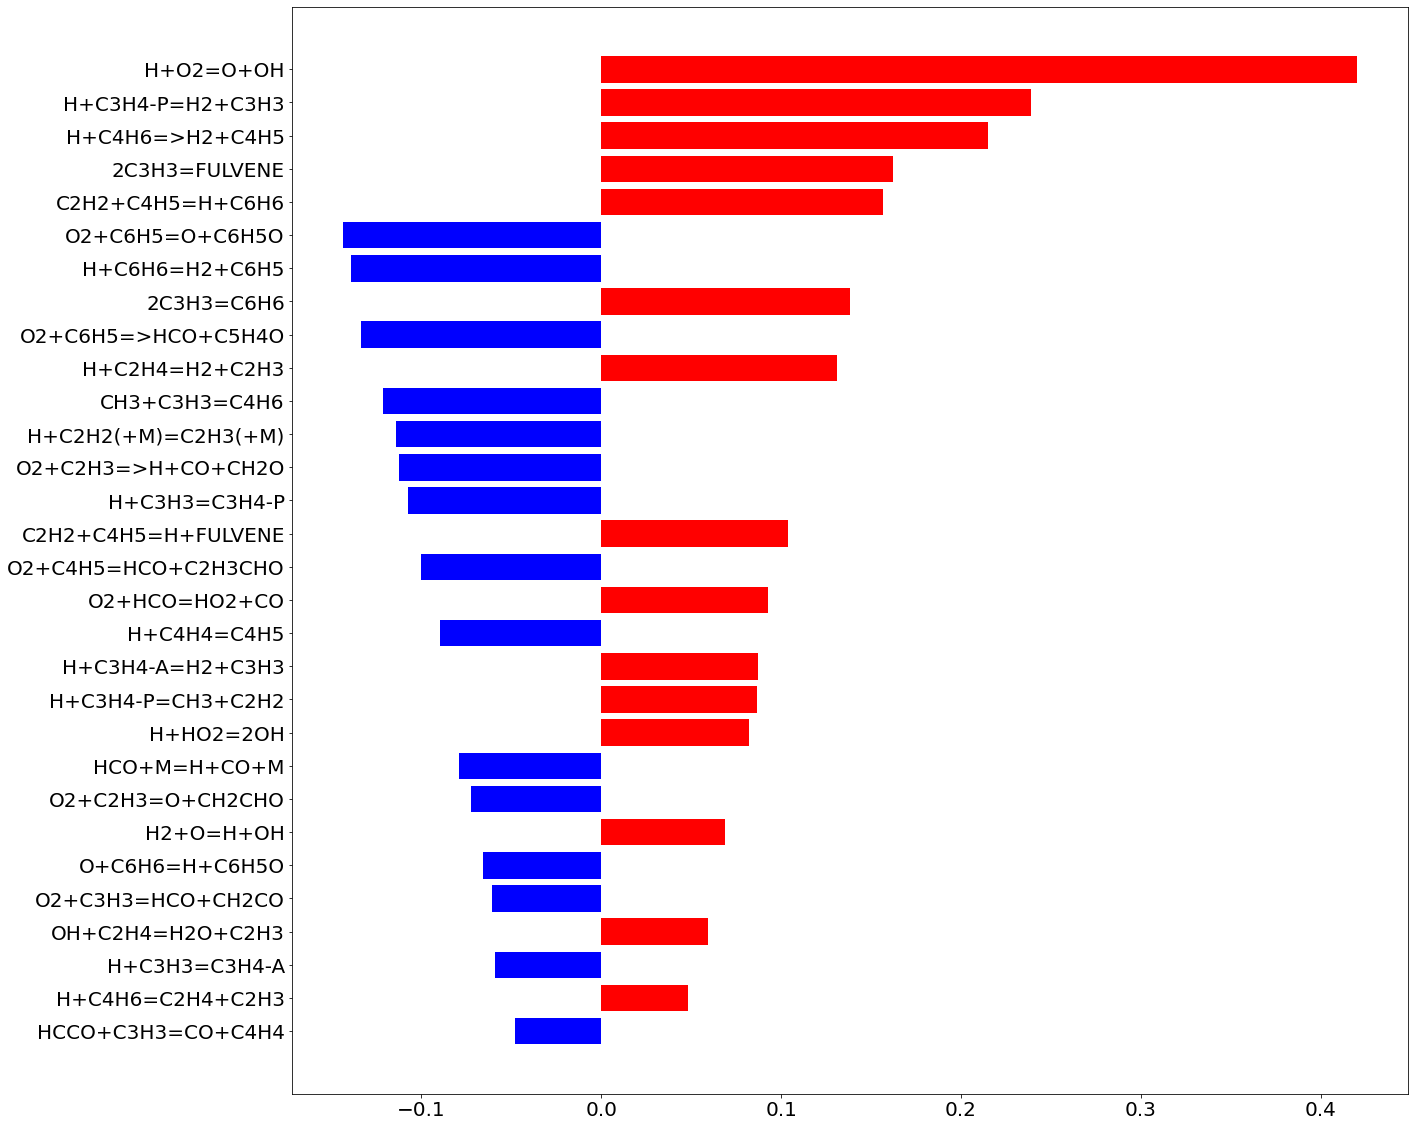

In [11]:
colori = []
for i in coefficients:
    if (i>=0):
        colori.append('red')
    else:
        colori.append('blue')
plt.rcParams["figure.figsize"]=20,20
plt.barh(reactionprinted, coefficients, color = colori)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.gca().invert_yaxis()
plt.show()